## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

## Data Lookup

In [2]:
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [5]:
df.shape

(550068, 10)

In [6]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [7]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


### Insights:

1. No missing values in the data
2. Product with ID <mark>P00265242</mark> has been sold the most (1880) times
3. The majority of the customers are <mark>Male (M)</mark> - 414259; while the rest are Females (F)
4. Age Group: <mark>26-35</mark> have made the maximum number of purchases (219587)
5. City Category: <mark>B</mark>, i.e., Tier 2 cities have made the maximum purchases (231173)
6. The lowest purchase made was of \$12
7. The highest purchase made was of \$23961

## Unique values:

In [8]:
for i in df.columns:
    print(i, " : ", df[i].unique(), "\n")

User_ID  :  [1000001 1000002 1000003 ... 1004113 1005391 1001529] 

Product_ID  :  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'] 

Gender  :  ['F' 'M'] 

Age  :  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation  :  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

City_Category  :  ['A' 'C' 'B'] 

Stay_In_Current_City_Years  :  ['2' '4+' '3' '1' '0'] 

Marital_Status  :  [0 1] 

Product_Category  :  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

Purchase  :  [ 8370 15200  1422 ...   135   123   613] 



In [9]:
for i in df.columns:
    print(i, " : ", df[i].nunique(), "\n")

User_ID  :  5891 

Product_ID  :  3631 

Gender  :  2 

Age  :  7 

Occupation  :  21 

City_Category  :  3 

Stay_In_Current_City_Years  :  5 

Marital_Status  :  2 

Product_Category  :  20 

Purchase  :  18105 



## Data Cleaning

In [10]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [11]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+", "")
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [12]:
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

## Data Distribution

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical \
· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed \
· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [13]:
df.select_dtypes(include = ['int64']).skew()

User_ID                       0.003066
Occupation                    0.400140
Stay_In_Current_City_Years    0.317236
Marital_Status                0.367437
Product_Category              1.025735
Purchase                      0.600140
dtype: float64

· It is the sharpness of the peak of a frequency-distribution curve .It is actually the measure of outliers present in the distribution. \
· High kurtosis in a data set is an indicator that data has heavy outliers. \
· Low kurtosis in a data set is an indicator that data has lack of outliers. \
· If kurtosis value + means pointy and — means flat.


· If the distribution is tall and thin it is called a leptokurtic distribution (Kurtosis > 1). Values in a leptokurtic distribution are near the mean or at the extremes. \
· A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic (Kurtosis < 1) distribution. \
· A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic (Kurtosis=0) distribution. A mesokurtic distribution looks more close to a normal distribution.

In [14]:
df.select_dtypes(include = ['int64']).kurt(axis = 0)

User_ID                      -1.195501
Occupation                   -1.216114
Stay_In_Current_City_Years   -1.068729
Marital_Status               -1.864997
Product_Category              1.234757
Purchase                     -0.338378
dtype: float64

Give analysis of distribution from kurt

In [15]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No missing values in the dataset

In [16]:
df.duplicated(keep = 'first').sum()

0

No duplicate data entries in the dataset

## Data Visualisation

In [17]:
numerical_cols = [col for col in df.select_dtypes(include = ['int64']).columns]
numerical_cols

['User_ID',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category',
 'Purchase']

The mu (mean) is 9263.968712959126 and sigma (standard deviation) is 5023.065393820627 for the curve


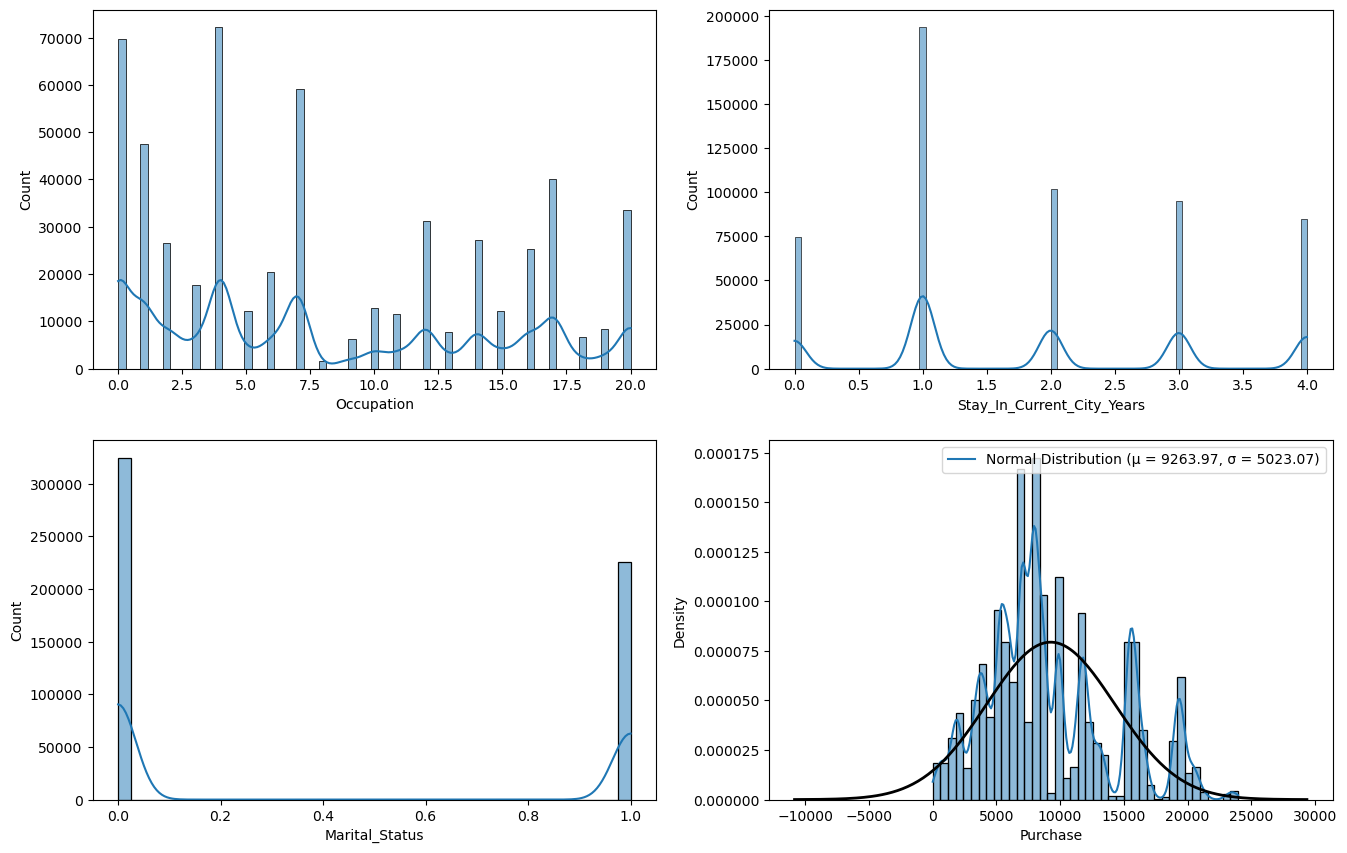

In [18]:
def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)

#Creating a grid of plots with spacing on the top of 0.9
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.subplots_adjust(top=0.9)

# Plot distribution plots for each specified column
sns.histplot(df['Occupation'], kde=True, ax=axis[0,0])
sns.histplot(df['Stay_In_Current_City_Years'], kde=True, ax=axis[0,1])
sns.histplot(df['Marital_Status'], kde=True, ax=axis[1,0])
sns.histplot(df['Purchase'], kde = True, ax=axis[1,1], bins=40, stat="density")
mu = df['Purchase'].mean()
sigma = df['Purchase'].std()
normal(mu, sigma)

# Fitting the target variable to the normal curve 
print("The mu (mean) is {} and sigma (standard deviation) is {} for the curve".format(mu, sigma))

# Adding a legend for the 'Purchase' distribution plot
axis[1,1].legend(['Normal Distribution (μ = {:.2f}, σ = {:.2f})'.format(mu, sigma)], loc='best')

# Show the plots
plt.show()

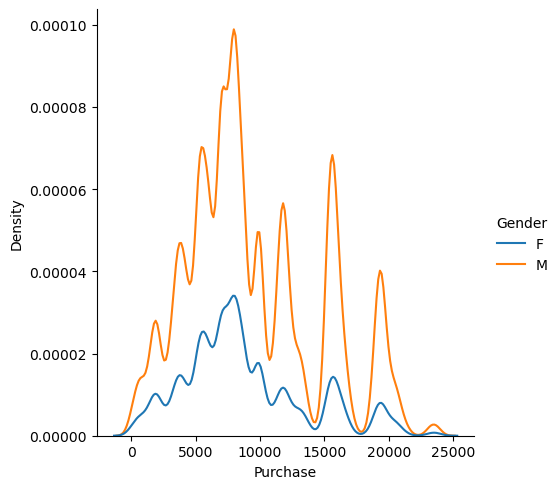

In [19]:
sns.displot(df, x = 'Purchase', kind = 'kde', hue = 'Gender')

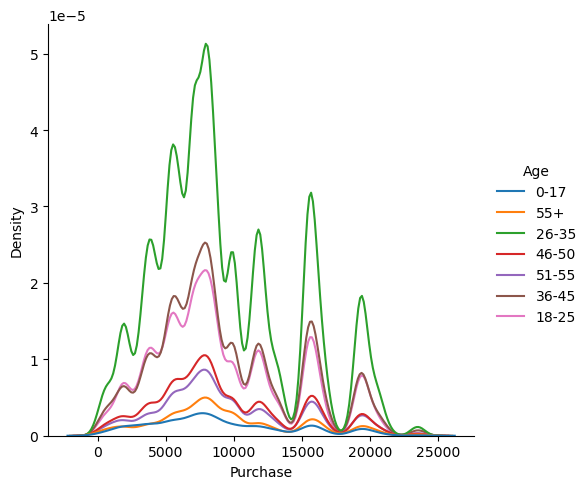

In [20]:
sns.displot(df, x = 'Purchase', kind = 'kde', hue = 'Age')

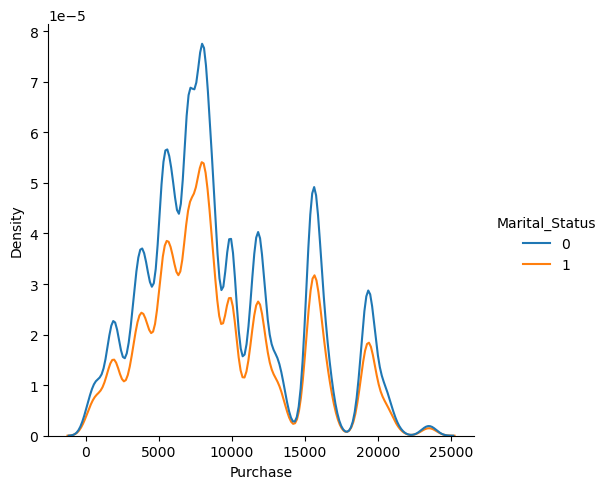

In [21]:
sns.displot(df, x = 'Purchase', kind = 'kde', hue = 'Marital_Status')

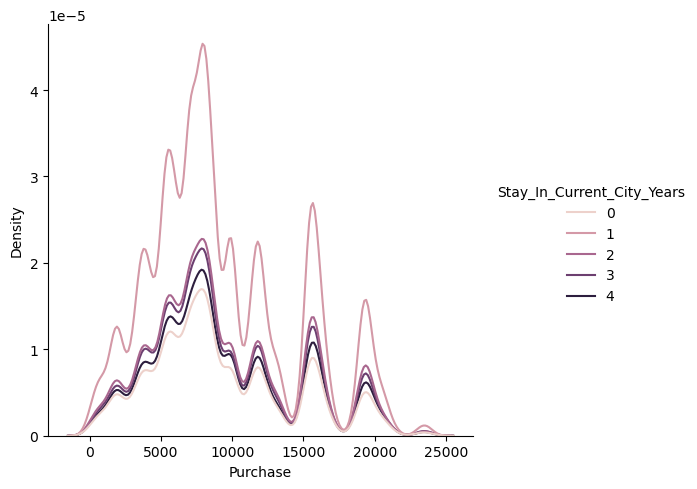

In [22]:
sns.displot(df, x = 'Purchase', kind = 'kde', hue = 'Stay_In_Current_City_Years')

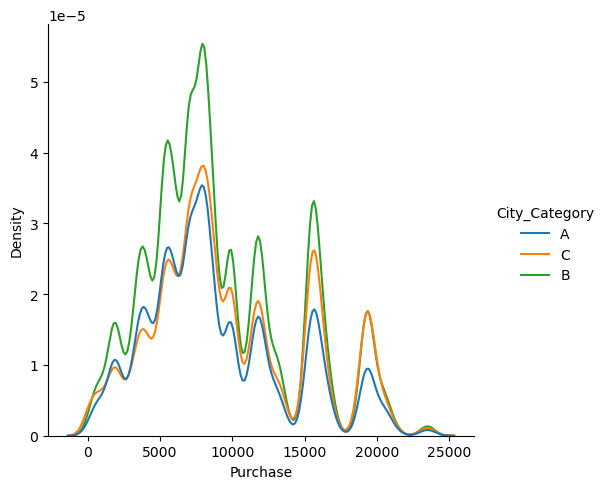

In [23]:
sns.displot(df, x = 'Purchase', kind = 'kde', hue = 'City_Category')

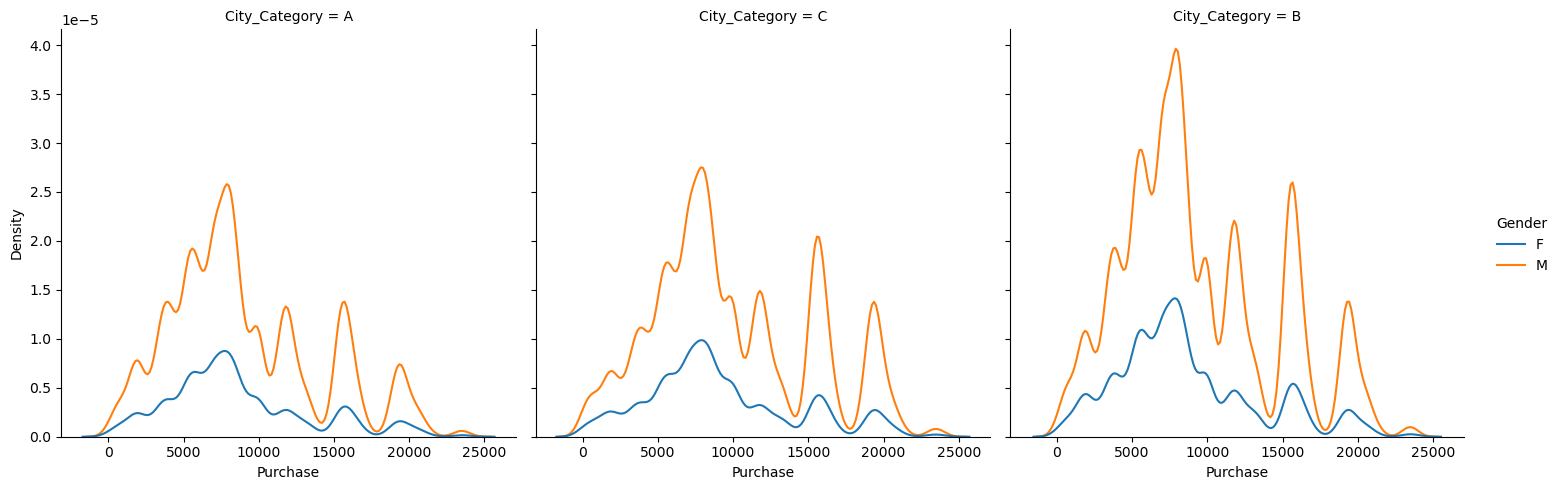

In [24]:
sns.displot(df, x="Purchase", hue="Gender", col="City_Category", kind="kde")

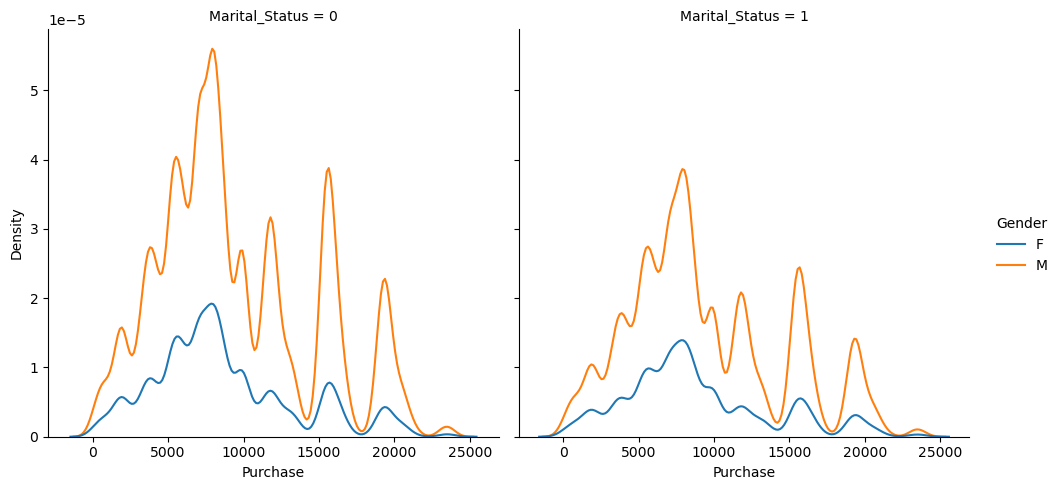

In [25]:
sns.displot(df, x="Purchase", hue="Gender", col="Marital_Status", kind="kde")

In [26]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

<Axes: xlabel='Purchase', ylabel='Count'>

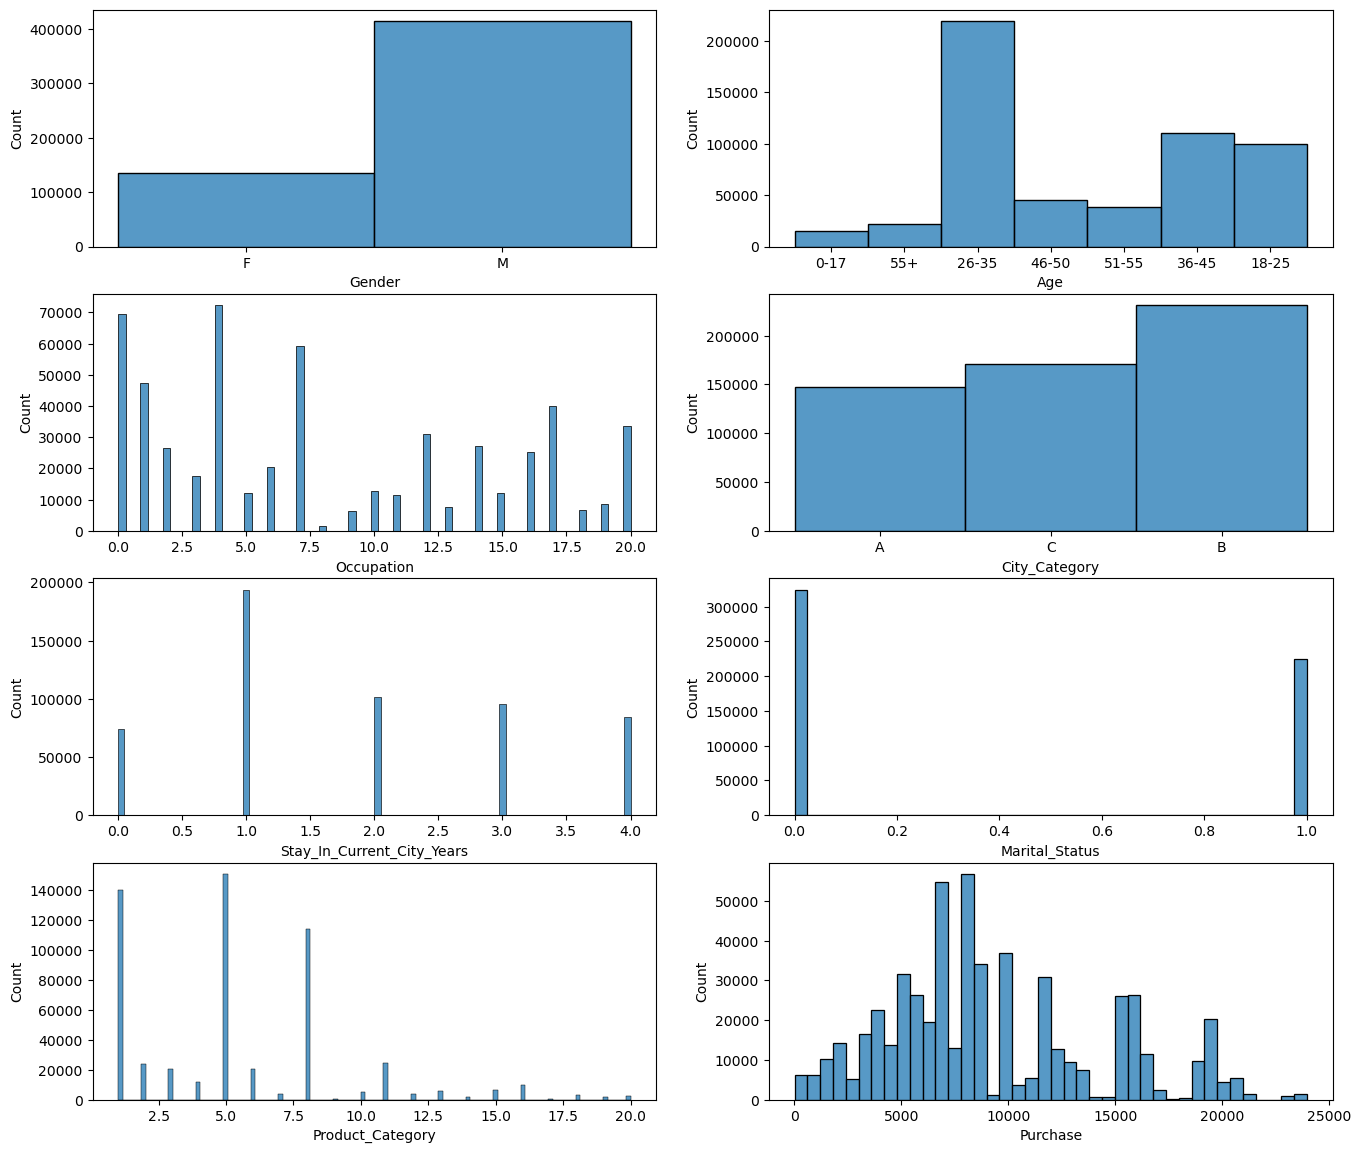

In [27]:
#Creating a grid of plots with spacing on the top of 0.9
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(df, x = "Gender", ax = axis[0,0])
sns.histplot(df, x = "Age", ax = axis[0,1])
sns.histplot(df, x = "Occupation", ax = axis[1,0])
sns.histplot(df, x = "City_Category", ax = axis[1,1])
sns.histplot(df, x = "Stay_In_Current_City_Years", ax = axis[2,0])
sns.histplot(df, x = "Marital_Status", ax = axis[2,1])
sns.histplot(df, x = "Product_Category", ax = axis[3,0])
sns.histplot(df, x = "Purchase", bins = 40, ax = axis[3,1])


### Observations:

1. Gender - Majority of the purchases are made by Males, while Females form the minority
2. Age - People around the age of 26-35 have made the majority of the purchases, while 0-17 age bracket were the minority
3. People with occupation 8 made the lease amount of purchases
4. Majority of the purchases were made in the City B category, while A had the least out of the three city types
5. People who have lived in the city for about a year had the most amount of purchases made, whereas people with 0 or 4+ years in the city, i.e., new residents or well settled residents made less number of purchases
6. Most of the buyers were single (unmarried)
7. Product categories 1,5,8 made the maximum number of purchases

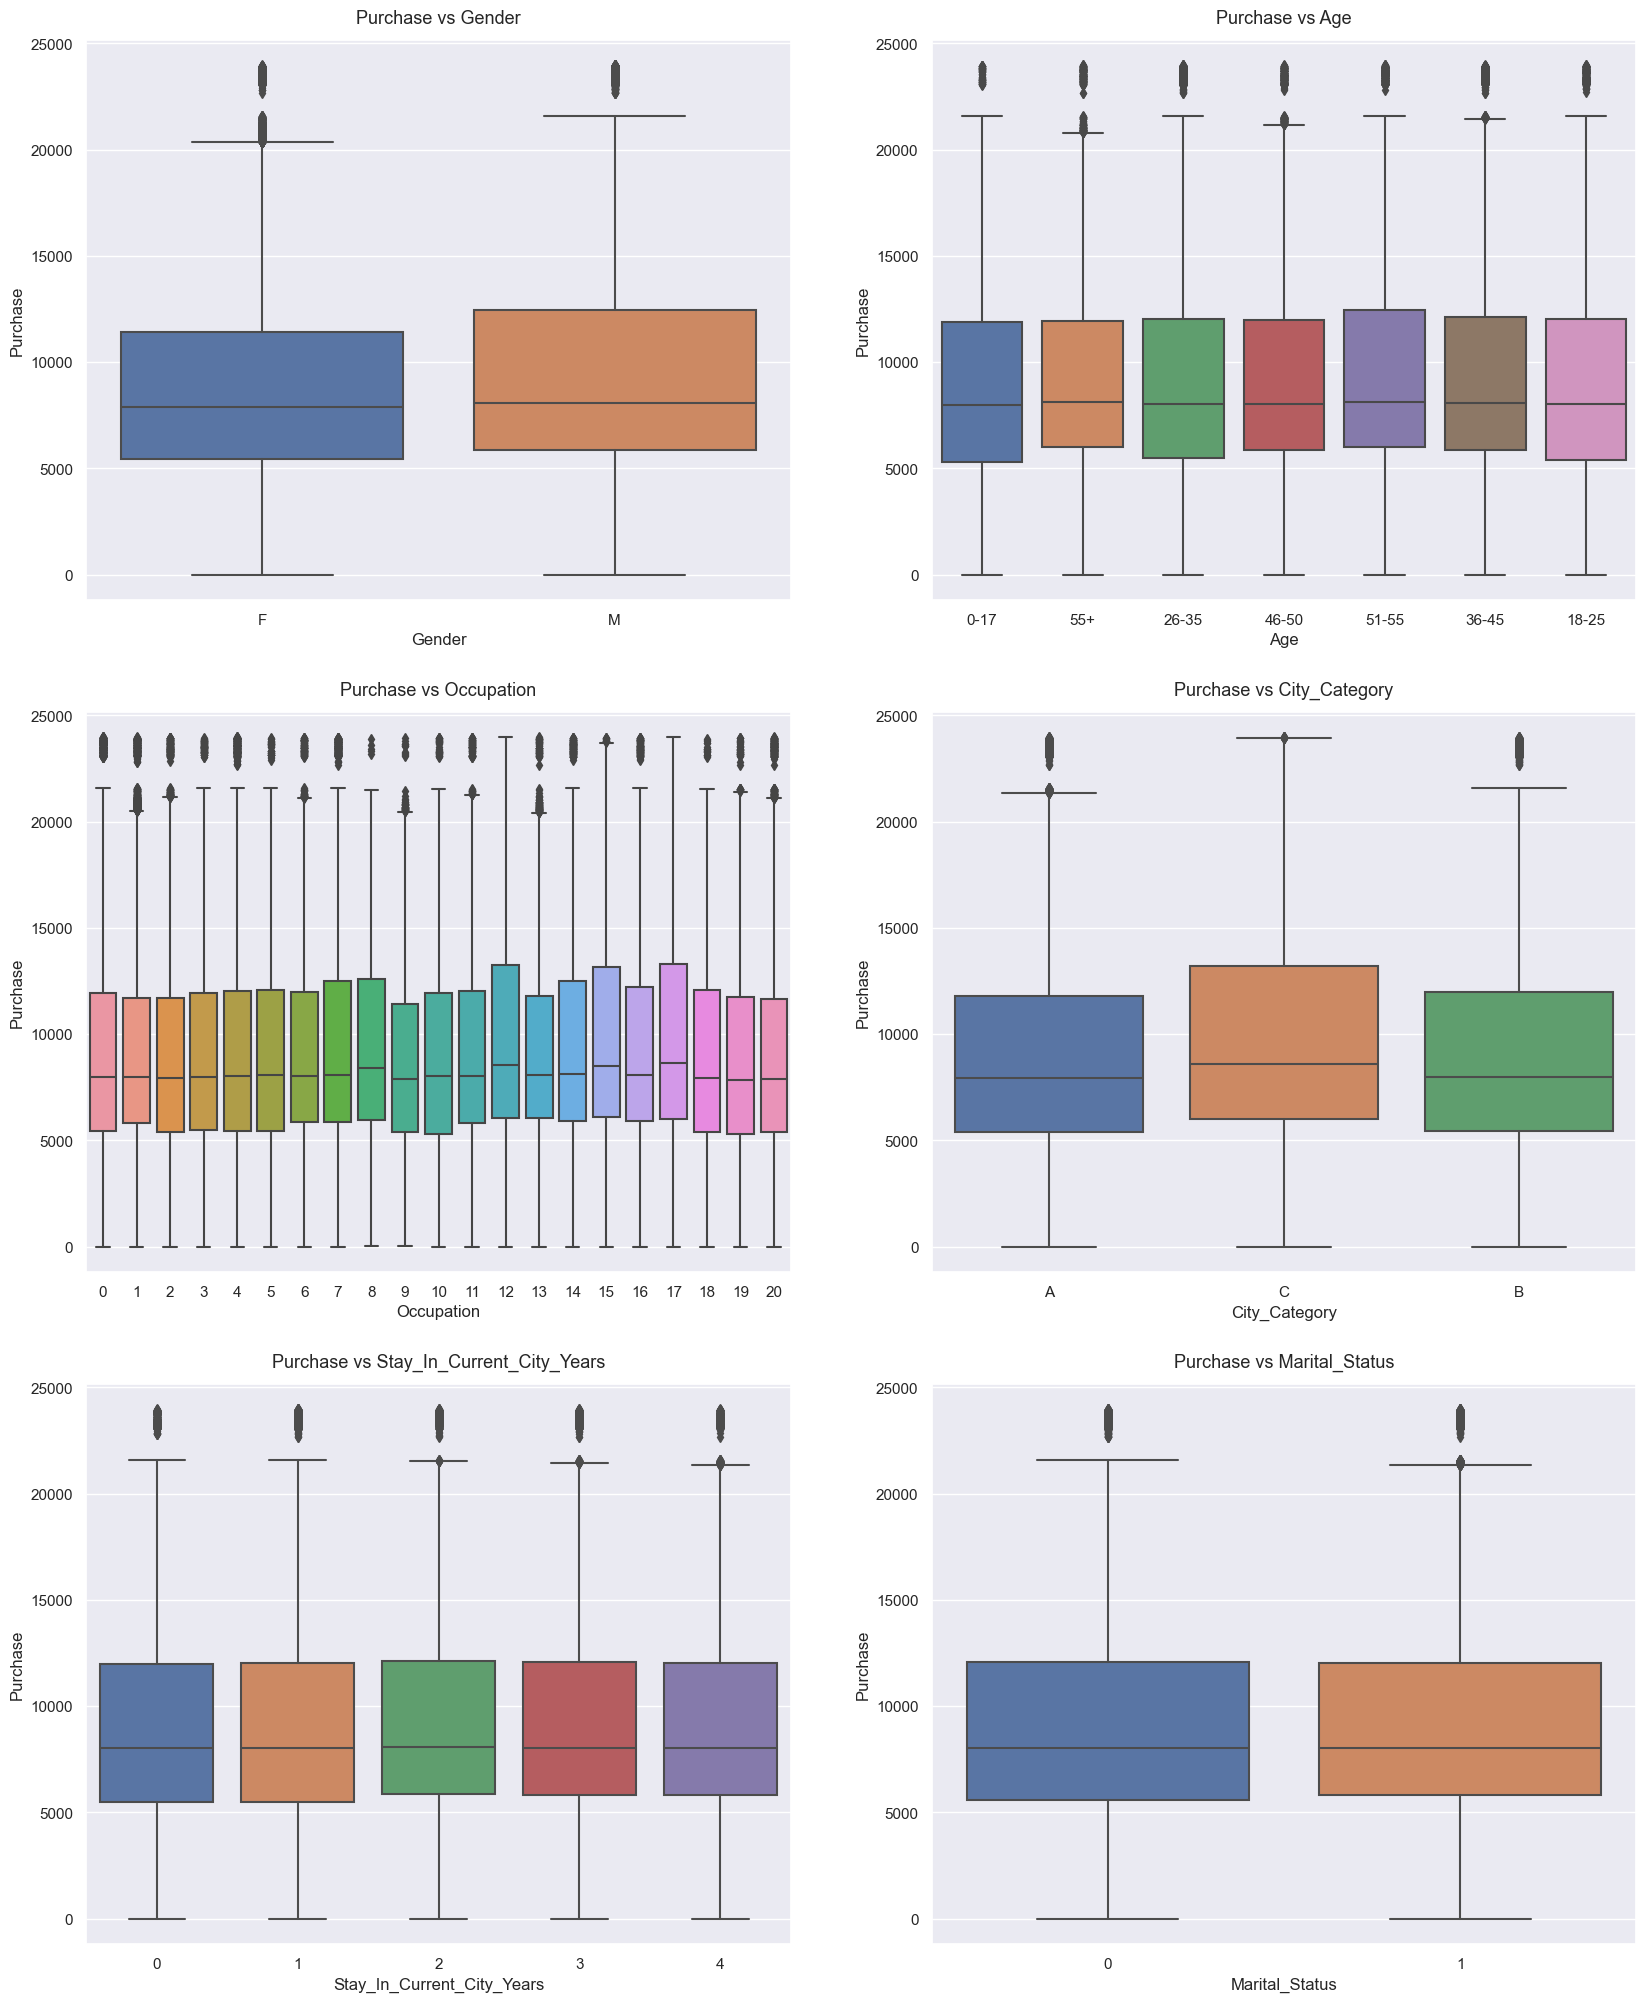

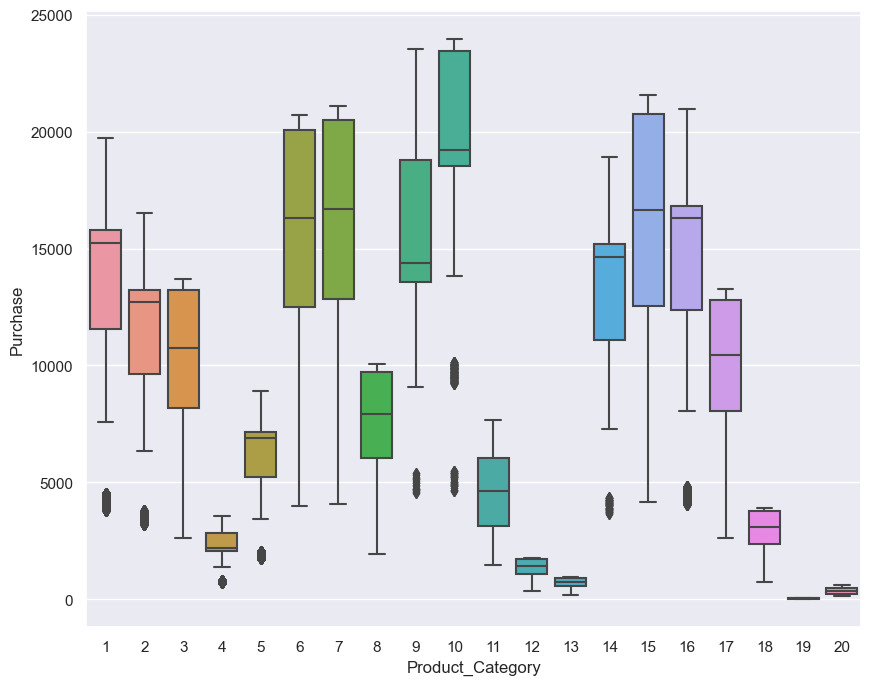

In [28]:
attr = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attr[count], ax=axs[row, col])
        axs[row,col].set_title(f"Purchase vs {attr[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attr[-1])
plt.show()

## Data Analysis

### 1. Analysis based on Gender of the customers

In [29]:
#Data for transactions made per user
gender_df = df.groupby(['User_ID', 'Gender']).agg({"Purchase" : "sum"})
gender_df = gender_df.reset_index()
gender_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


<Axes: xlabel='Purchase', ylabel='Count'>

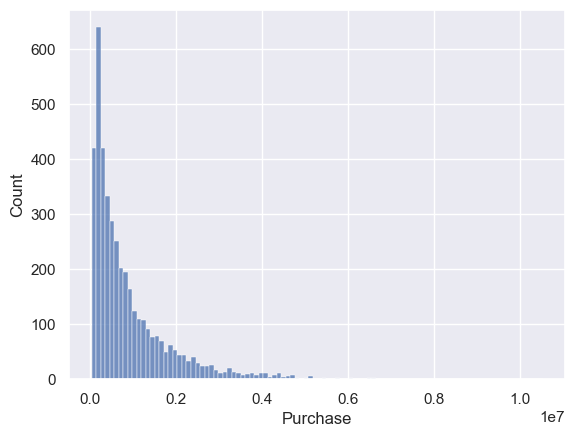

In [30]:
sns.histplot(gender_df[gender_df['Gender'] == "M"], x = "Purchase", bins = 100)

<Axes: xlabel='Purchase', ylabel='Count'>

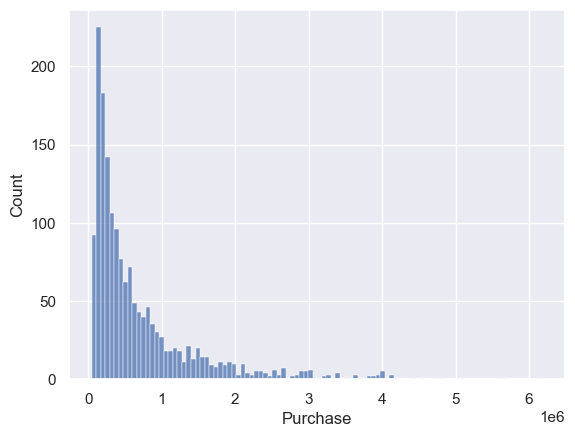

In [31]:
sns.histplot(gender_df[gender_df['Gender'] == "F"], x = "Purchase", bins = 100)

In [32]:
temp_df = gender_df.groupby('Gender').agg({"Purchase" : ["mean","count"]})
temp_df = temp_df.reset_index()
temp_df

Gender       Purchase      
                   mean count
0      F  712024.394958  1666
1      M  925344.402367  4225

In [33]:
f_df = temp_df[gender_df['Gender'] == 'F']
per_female = f_df[('Purchase','count')]/temp_df[('Purchase','count')].sum()

print("Percentage of Female customers : ", per_female[0]*100)
print("Percentage of Male customers : ", (1-per_female[0])*100)

Percentage of Female customers :  28.28042777117637
Percentage of Male customers :  71.71957222882364


There were $1666 ~(28\%)$ different female customers with their avergae spending of $\$7,12,024$ , \
Whereas there were $4225~(72\%)$ different male customers with their average spending of $\$9,35,344$ 

Please Note: These findings represent the avergae spending (for multiple purchases) per user based on their gender, and not the average spending per purchase based on their gender.

In [34]:
temp_df = df.groupby('Gender').agg({"Purchase" : ["mean", "count"]})
temp_df

Purchase        
               mean   count
Gender                     
F       8734.565765  135809
M       9437.526040  414259

Here, we see that the average amount spent by a user for one purchase based on their gender: 
- The average amount spent by females per purchase is also lower than that of males. 
- Males spent on an average per purchase an amount of $\$9,437$ , whereas Females have spent only $\$8,734$ per purchase

### 2. Analysis based on Marital Status

In [35]:
marital_df = df.groupby(['User_ID', 'Marital_Status']).agg({'Purchase':'sum'}).reset_index()
marital_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


<Axes: xlabel='Purchase', ylabel='Count'>

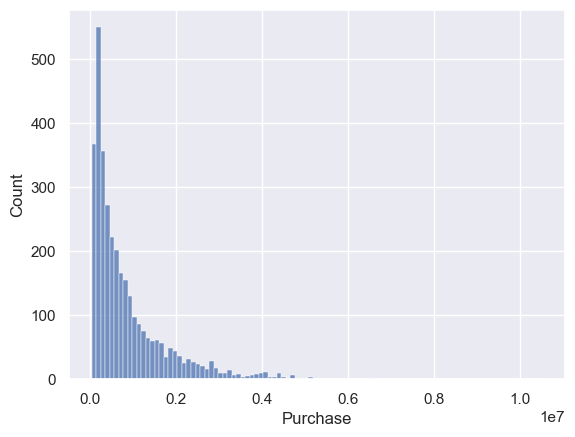

In [36]:
sns.histplot(marital_df[marital_df['Marital_Status'] == 0], x = "Purchase", bins = 100)

<Axes: xlabel='Purchase', ylabel='Count'>

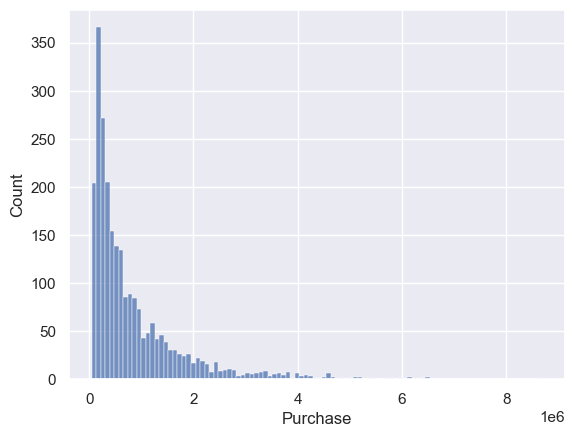

In [37]:
sns.histplot(marital_df[marital_df['Marital_Status'] == 1], x = "Purchase", bins = 100)

In [38]:
temp_df = marital_df.groupby('Marital_Status').agg({'Purchase': ['mean', 'count']})
temp_df = temp_df.reset_index()
temp_df

Marital_Status       Purchase      
                           mean count
0              0  880575.781972  3417
1              1  843526.796686  2474

In [39]:
single_df = temp_df[temp_df["Marital_Status"] == 0]
per_single = single_df[('Purchase','count')]/temp_df[('Purchase','count')].sum()

print("Percentage of Single customers : ", per_single[0]*100)
print("Percentage of Married customers : ", (1-per_single[0])*100)

Percentage of Single customers :  58.0037345102699
Percentage of Married customers :  41.9962654897301


We see that single people (58\%) spend the most on an average of about $\$ 8,80,575$ \
Whereas, married couples (42\%) spend a bit lesser on average of about $\$ 8,43,526$

### 3. Analysis based on both Marital Status and Gender

In [40]:
joined_mg_df = pd.merge(gender_df, marital_df, on = 'User_ID', how = 'inner')
joined_mg_df

,User_ID,Gender,Purchase_x,Marital_Status,Purchase_y
0,1000001,F,334093,0,334093
1,1000002,M,810472,0,810472
2,1000003,M,341635,0,341635
3,1000004,M,206468,1,206468
4,1000005,M,821001,1,821001
...,...,...,...,...,...
5886,1006036,F,4116058,1,4116058
5887,1006037,F,1119538,0,1119538
5888,1006038,F,90034,0,90034
5889,1006039,F,590319,1,590319


In [41]:
joined_mg_df.groupby(['Gender','Marital_Status']).agg({'Purchase_x' : ['mean', 'count']})

Purchase_x      
                                mean count
Gender Marital_Status                     
F      0               722443.639916   947
       1               698301.133519   719
M      0               941203.773279  2470
       1               903023.806268  1755

From the above, we can see that single men make the majority of the buyers and also tend to spend the most on an average of $\$9,41,203$, with a count of $2470$. \
Whereas, married women tend to spend the least on average of about $\$6,98,301$ with a count of $719$. This could be because married men spend more of about $\$9,03,023$ with a count of $1755$.

### 4. Analysis based on Product_Category

In [42]:
product_df = df.groupby('Product_Category').agg({"Purchase" : ["sum","mean","count",]})
product_df.sort_values(('Purchase','sum'), ascending = False)

Purchase                      
                         sum          mean   count
Product_Category                                  
1                 1910013754  13606.218596  140378
5                  941835229   6240.088178  150933
8                  854318799   7498.958078  113925
6                  324150302  15838.478550   20466
2                  268516186  11251.935384   23864
3                  204084713  10096.705734   20213
16                 145120612  14766.037037    9828
11                 113791115   4685.268456   24287
10                 100837301  19675.570927    5125
15                  92969042  14780.451828    6290
7                   60896731  16365.689600    3721
4                   27380488   2329.659491   11753
14                  20014696  13141.625739    1523
18                   9290201   2972.864320    3125
9                    6370324  15537.375610     410
17                   5878699  10170.759516     578
12                   5331844   1350.859894    3947
13                   4008601    722.400613    5549
20                    944727    370.481176    2550
19                     59378     37.041797    1603

In [43]:
product_df.sort_values(('Purchase','mean'), ascending = False)

Purchase                      
                         sum          mean   count
Product_Category                                  
10                 100837301  19675.570927    5125
7                   60896731  16365.689600    3721
6                  324150302  15838.478550   20466
9                    6370324  15537.375610     410
15                  92969042  14780.451828    6290
16                 145120612  14766.037037    9828
1                 1910013754  13606.218596  140378
14                  20014696  13141.625739    1523
2                  268516186  11251.935384   23864
17                   5878699  10170.759516     578
3                  204084713  10096.705734   20213
8                  854318799   7498.958078  113925
5                  941835229   6240.088178  150933
11                 113791115   4685.268456   24287
18                   9290201   2972.864320    3125
4                   27380488   2329.659491   11753
12                   5331844   1350.859894    3947
13                   4008601    722.400613    5549
20                    944727    370.481176    2550
19                     59378     37.041797    1603

In [44]:
product_df.sort_values(('Purchase','count'), ascending = False)

Purchase                      
                         sum          mean   count
Product_Category                                  
5                  941835229   6240.088178  150933
1                 1910013754  13606.218596  140378
8                  854318799   7498.958078  113925
11                 113791115   4685.268456   24287
2                  268516186  11251.935384   23864
6                  324150302  15838.478550   20466
3                  204084713  10096.705734   20213
4                   27380488   2329.659491   11753
16                 145120612  14766.037037    9828
15                  92969042  14780.451828    6290
13                   4008601    722.400613    5549
10                 100837301  19675.570927    5125
12                   5331844   1350.859894    3947
7                   60896731  16365.689600    3721
18                   9290201   2972.864320    3125
20                    944727    370.481176    2550
19                     59378     37.041797    1603
14                  20014696  13141.625739    1523
17                   5878699  10170.759516     578
9                    6370324  15537.375610     410

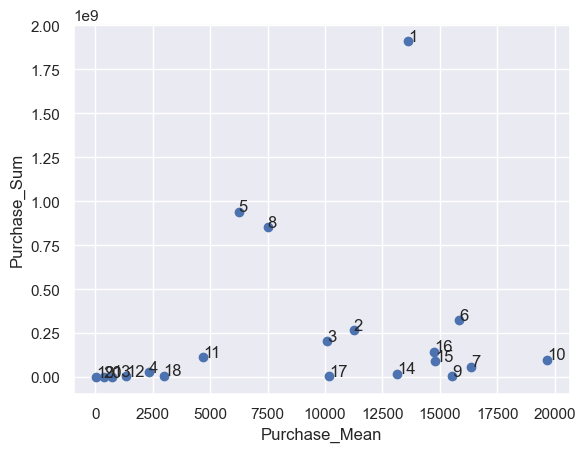

In [45]:
plt.scatter(product_df[('Purchase','mean')],product_df[('Purchase','sum')])
plt.xlabel("Purchase_Mean")
plt.ylabel("Purchase_Sum")

for row in product_df[[('Purchase','mean'),('Purchase','sum')]].itertuples():
    plt.text(row._1, row._2, row.Index)
plt.show()

From the above graph, we can see that:
- Product_Categories 1,5,8 constitute for the majority of the purchases made and also of the maximum total spending with Product_Category 1 making around $\$2$ billion in returns. 
- Product_Category 10 had the highest average purchase of $\$19,675$

### 5. Analysis based on Age 

In [46]:
age_df = df.groupby('Age').agg({'Purchase' : ['sum','mean','count']})
age_df = age_df.reset_index()
age_df

Age    Purchase                     
                 sum         mean   count
0   0-17   134913183  8933.464640   15102
1  18-25   913848675  9169.663606   99660
2  26-35  2031770578  9252.690633  219587
3  36-45  1026569884  9331.350695  110013
4  46-50   420843403  9208.625697   45701
5  51-55   367099644  9534.808031   38501
6    55+   200767375  9336.280459   21504

In [47]:
age_df.sort_values(('Purchase', 'sum'), ascending = False)

Age    Purchase                     
                 sum         mean   count
2  26-35  2031770578  9252.690633  219587
3  36-45  1026569884  9331.350695  110013
1  18-25   913848675  9169.663606   99660
4  46-50   420843403  9208.625697   45701
5  51-55   367099644  9534.808031   38501
6    55+   200767375  9336.280459   21504
0   0-17   134913183  8933.464640   15102

In [48]:
age_df.sort_values(('Purchase', 'count'), ascending = False)

Age    Purchase                     
                 sum         mean   count
2  26-35  2031770578  9252.690633  219587
3  36-45  1026569884  9331.350695  110013
1  18-25   913848675  9169.663606   99660
4  46-50   420843403  9208.625697   45701
5  51-55   367099644  9534.808031   38501
6    55+   200767375  9336.280459   21504
0   0-17   134913183  8933.464640   15102

In [49]:
age_df.sort_values(('Purchase', 'mean'), ascending = False)

Age    Purchase                     
                 sum         mean   count
5  51-55   367099644  9534.808031   38501
6    55+   200767375  9336.280459   21504
3  36-45  1026569884  9331.350695  110013
2  26-35  2031770578  9252.690633  219587
4  46-50   420843403  9208.625697   45701
1  18-25   913848675  9169.663606   99660
0   0-17   134913183  8933.464640   15102

In [50]:
for i in range(len(age_df)):
    per = (age_df[("Purchase", "count")][i]/np.sum(age_df[("Purchase", "count")])) * 100
    print("Percentage of purchases made by Age Group - ", age_df["Age"][i], " is : ", round(per,0), "%")

Percentage of purchases made by Age Group -  0-17  is :  3.0 %
Percentage of purchases made by Age Group -  18-25  is :  18.0 %
Percentage of purchases made by Age Group -  26-35  is :  40.0 %
Percentage of purchases made by Age Group -  36-45  is :  20.0 %
Percentage of purchases made by Age Group -  46-50  is :  8.0 %
Percentage of purchases made by Age Group -  51-55  is :  7.0 %
Percentage of purchases made by Age Group -  55+  is :  4.0 %


From the above, we see that :

1. Age group of 26-35 have made the maximum number of purchases and have contributed to around $\$ 2$ billion
2. Age group of 51-55 tend to spend more per purchase as compared to each other group; an amount of $\$ 9,534$.

## Valuable Insights:

- For <mark>Gender</mark> feature, ~75% of the number of purchases are made by Male customer's and rest of the 25% is done by female customer's. This tells us the Male consumers are the major contributors to the number of sales for the retail store.On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

        Average amount spend by Male customers: 9,25,408.28
        Average amount spend by Female customers: 7,12,217.18
    
- For <mark>Age</mark> feature, we observed that ~80% of the customer's who belong to the age group 18-45 (40%: 26-35, 20%: 36-45, 18%: 18-25) tend to spend the most.


- When we combined <mark>Purchase</mark> and <mark>Marital_Status</mark> for analysis (60% are Single, 40% are Married). We came to know that Single Men spend the most during the Black Friday. It also tells that Men tend to spend less once they are married. It maybe because of the added responsibilities.

- There is an interesting column <mark>Stay_In_Current_City_Years</mark>, after analyzing this column we came to know the people who have spent 1 year in the city tend to spend the most. This is understandable as, people who have spent more than 4 years in the city are generally well settled and are less interested in buying new things as compared to the people new to the city, who tend to buy more (35% Staying in the city since 1 year, 18% since 2 years, 17% since 3 years).

- When examining the <mark>City_Category</mark> which city the product was purchased to our surprise, even though the city B is majorly responsible for the overall sales income, but when it comes to the above product, it majorly purchased in the city C.

- Total of 20 product_categories are there. <mark>Product_Category</mark> - 1, 5, & 8 have highest purchasing frequency.

- There are 20 differnent types of <mark>Occupation's</mark> in the city

## Recommendations

- <mark>Men spent more money than women</mark>, So company should focus on retaining the female customers and getting more female customers.



- <mark>Product_Category - 1, 5 & 8</mark> have highest purchasing frequency. It means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.

- <mark>Product_Category - 10</mark> has the highest average amount spent per purchase. It means that the company can focus on increasing the sales of products belonging to this category.

- <mark>Unmarried customers spend more money than married customers</mark>, So company should focus on acquisition of married customers.

- Customers in the <mark>age group 18-45</mark> spend more money than the others, So company should focus on acquisition of customers of other age groups.

- Customers in the <mark>age group 51-55</mark> spend more on average on a purchase, a company can focus on listing more products that can be of interest to this age group to improve their sales.

- The <mark>tier-B</mark>  has the highest number of population, management should open more outlets in the tier-A and tier-C cities in order to increase the buisness.